<a href="https://colab.research.google.com/github/maeliech/DB_Group/blob/main/Final_DATABASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DATABASE: FINALTERM ASSIGNMENT: GROUP F**

## 1- **Data Diagramm**

After sharing ideas and finding a subject (presented in the "FinalProject_Proposal" PDF, we created a diagram of our model.

One of our members had the opportunity to do an **internship in a software selling company**. Because we wanted to discover real-world tasks, we decided to use his personal experience as our subject.

Here is the **full subject**:
A company creates and then sells softwares to different clients (various companies). It needs you to create a database to manage these clients, but also the softwares and all the events happening in this company.

The important points to keep are:
- Identifying what are the **main actors** of the company
- How are they **interacting** with each others (what relations between entities)
- What **defines** each entity

It is also important to point out that when creating a database of a certain scale, we must be extremely careful to the following points:
- No **redundancy**
- Each entity must be well **identifiable**
-** No ambiguity** on entities' characteristics
- The database actually responds to company's **needs**

To make this diagram, we used the website "Oracle data modeler" on Windows.

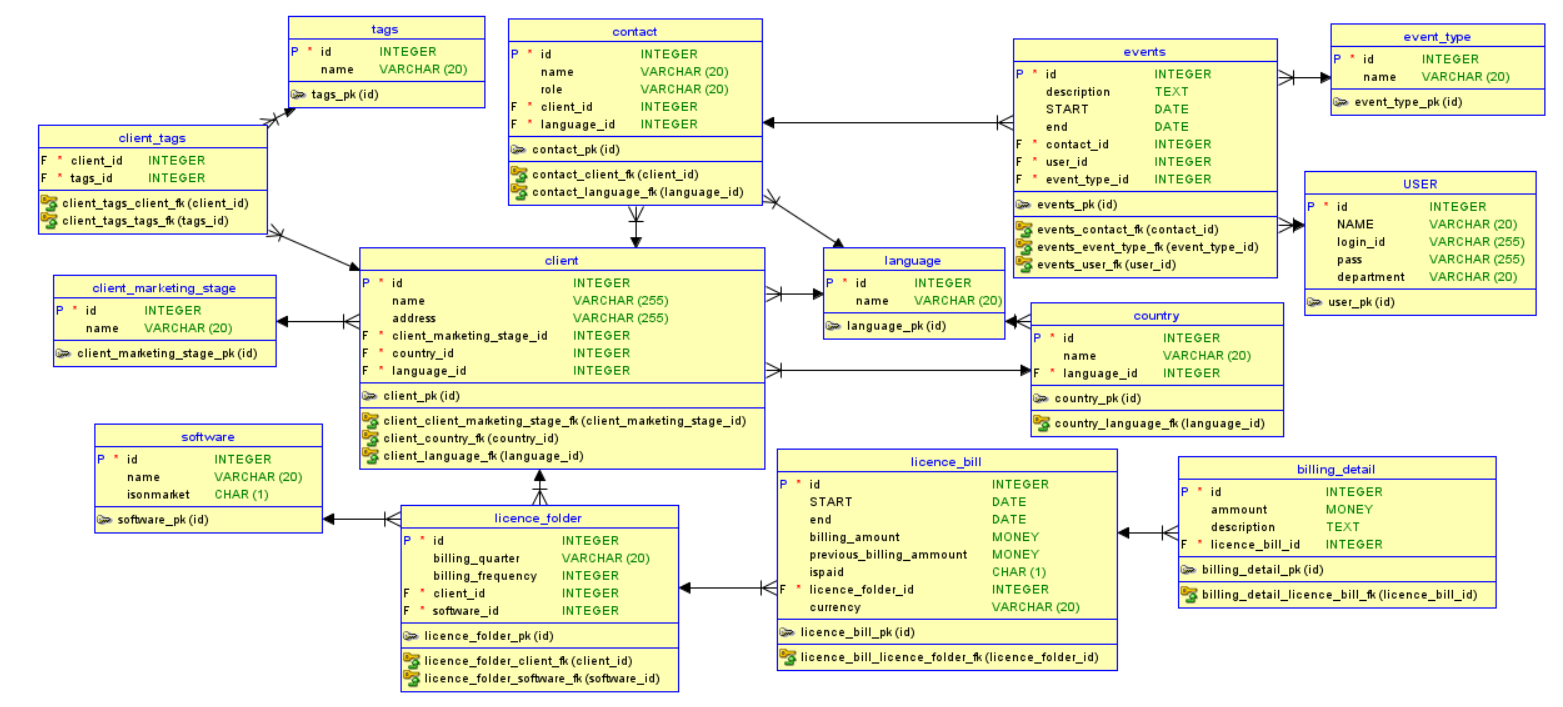

## 2- **Database script**

Based on the labs in class, we created the database using the SQL script generated before-hand using the oracle software.

In [ ]:
from sqlalchemy import create_engine
my_conn = create_engine('sqlite:////content/final.db')

### BILLING_DETAIL

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'billing_detail' (
    'id'              INTEGER NOT NULL,
    'ammount'         NUMBER(2),
    'description'     CLOB,
    'licence_bill_id' INTEGER NOT NULL,
    PRIMARY KEY       ('id'),
    FOREIGN KEY ('licence_bill_id') REFERENCES licence_bill ('id')
);
''')

### CLIENT

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'client'  (
    'id'                        INTEGER NOT NULL,
    'name'                      VARCHAR2(120),
    'address'                   VARCHAR2(255),
    'client_marketing_stage_id' INTEGER NOT NULL,
    'country_id'                INTEGER NOT NULL,
    'language_id'               INTEGER NOT NULL,
    PRIMARY KEY                 ('id'),
    FOREIGN KEY                 ('client_marketing_stage_id') REFERENCES 'client_marketing_stage' ('id'),
    FOREIGN KEY                 ('country_id') REFERENCES 'country' ('id'),
    FOREIGN KEY                 ('language_id') REFERENCES 'language' ('id')
);
''')

### CLIENT_MARKETING_STAGE

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'client_marketing_stage' (
    'id'        INTEGER NOT NULL,
    'name'      VARCHAR2(20),
    PRIMARY KEY ('id')
);
''')

### CLIENT_TAG

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'client_tags' (
    'client_id' INTEGER NOT NULL,
    'tags_id'   INTEGER NOT NULL,
    FOREIGN KEY ('client_id') REFERENCES 'client' ('id'),
    FOREIGN KEY ('tags_id') REFERENCES 'tags' ('id')
);
''')

### CONTACT

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'contact' (
    'id'          INTEGER NOT NULL,
    'name'        VARCHAR2(20),
    'role'        VARCHAR2(50),
    'client_id'   INTEGER NOT NULL,
    'language_id' INTEGER NOT NULL,
    PRIMARY KEY   ('id'),
    FOREIGN KEY   ('client_id') REFERENCES 'client' ('id'),
    FOREIGN KEY   ('language_id') REFERENCES 'language' ('id')
);
''')

### COUNTRY

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'country' (
    'id'          INTEGER NOT NULL,
    'name'        VARCHAR2(20),
    'language_id' INTEGER NOT NULL,
    PRIMARY KEY   ('id'),
    FOREIGN KEY   ('language_id') REFERENCES 'language' ('id')
);
''')

### EVENT_TYPE

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'event_type' (
    'id'          INTEGER NOT NULL,
    'name'        VARCHAR2(20),
    PRIMARY KEY   ('id')
);
''')

### EVENTS

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'events' (
    'id'            INTEGER NOT NULL,
    'description'   CLOB,
    'start'         DATE,
    'end'           DATE,
    'contact_id'    INTEGER NOT NULL,
    'user_id'       INTEGER NOT NULL,
    'event_type_id' INTEGER NOT NULL,
    PRIMARY KEY     ('id'),
    FOREIGN KEY     ('contact_id') REFERENCES 'contact' ('id'),
    FOREIGN KEY     ('user_id') REFERENCES 'user' ('id'),
    FOREIGN KEY     ('event_type_id') REFERENCES 'event_type' ('id')
);
''')

### LANGUAGE

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'language' (
    'id'            INTEGER NOT NULL,
    'name'          VARCHAR2(20),
    PRIMARY KEY     ('id')
);
''')

### LICENCE_BILL

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'licence_bill' (
    'id'                       INTEGER NOT NULL,
    'start'                    DATE,
    'end'                      DATE,
    'billing_amount'           NUMBER(2),
    'previous_billing_ammount' NUMBER(2),
    'ispaid'                   CHAR(1),
    'licence_folder_id'        INTEGER NOT NULL,
    'currency'                 VARCHAR2(20),
    PRIMARY KEY                ('id'),
    FOREIGN KEY                ('licence_folder_id') REFERENCES 'licence_folder' ('id')
);
''')

### LICENCE_FOLDER

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'licence_folder' (
    'id'                INTEGER NOT NULL,
    'billing_quarter'   VARCHAR2(20),
    'billing_frequency' INTEGER,
    'client_id'         INTEGER NOT NULL,
    'software_id'       INTEGER NOT NULL,
    PRIMARY KEY         ('id'),
    FOREIGN KEY         ('client_id') REFERENCES 'client' ('id'),
    FOREIGN KEY         ('software_id') REFERENCES 'software' ('id')
);
''')

### SOFTWARE

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'software' (
    'id'          INTEGER NOT NULL,
    'name'        VARCHAR2(20),
    'isonmarket'  CHAR(1),
    PRIMARY KEY   ('id')
);
''')

### TAGS

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS 'tags' (
    'id'          INTEGER NOT NULL,
    'name'        VARCHAR2(255),
    PRIMARY KEY   ('id')
);
''')

### USER

In [ ]:
r_set=my_conn.execute('''
CREATE TABLE IF NOT EXISTS "USER" (
    'id'         INTEGER NOT NULL,
    'name'       VARCHAR2(20),
    'login_id'   VARCHAR2(255),
    'pass'       VARCHAR2(255),
    'department' VARCHAR2(50),
    PRIMARY KEY  ('id')
);
''')

## 3- **Filling the database**

We then inserted the data. To do that, we used the SQL requet "INSERT INTO". It is important to be very careful to the type of data we enter in eacher subcategory in order not to generate errors.

### BILLING_DETAIL

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'billing_detail' ('id', 'ammount', 'description', 'licence_bill_id') VALUES (1, 100, 'Oracle', 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'billing_detail' ('id', 'ammount', 'description', 'licence_bill_id') VALUES (2, 200, 'Microsoft', 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'billing_detail' ('id', 'ammount', 'description', 'licence_bill_id') VALUES (3, 300, 'SAP', 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'billing_detail' ('id', 'ammount', 'description', 'licence_bill_id') VALUES (4, 400, 'IBM', 4);
''')

### CLIENT

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client' ('id', 'name', 'address', 'client_marketing_stage_id', 'country_id', 'language_id') VALUES (1, 'Oracle', 'Oracle address', 1, 1, 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client' ('id', 'name', 'address', 'client_marketing_stage_id', 'country_id', 'language_id') VALUES (2, 'Microsoft', 'Microsoft address', 2, 2, 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client' ('id', 'name', 'address', 'client_marketing_stage_id', 'country_id', 'language_id') VALUES (3, 'SAP', 'SAP address', 3, 3, 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client' ('id', 'name', 'address', 'client_marketing_stage_id', 'country_id', 'language_id') VALUES (4, 'IBM', 'IBM address', 1, 4, 4);
''')

### CLIENT_MARKETING_STAGE

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_marketing_stage' ('id', 'name') VALUES (1, 'Prospect');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_marketing_stage' ('id', 'name') VALUES (2, 'Client');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_marketing_stage' ('id', 'name') VALUES (3, 'Partner');
''')

### CLIENT_TAG

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_tags' ('client_id', 'tags_id') VALUES (1, 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_tags' ('client_id', 'tags_id') VALUES (2, 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_tags' ('client_id', 'tags_id') VALUES (3, 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'client_tags' ('client_id', 'tags_id') VALUES (4, 4);
''')

### CONTACT

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'contact' ('id', 'name', 'role', 'client_id', 'language_id') VALUES (1, 'John', 'CEO', 1, 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'contact' ('id', 'name', 'role', 'client_id', 'language_id') VALUES (2, 'Mary', 'CEO', 2, 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'contact' ('id', 'name', 'role', 'client_id', 'language_id') VALUES (3, 'Peter', 'CEO', 3, 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'contact' ('id', 'name', 'role', 'client_id', 'language_id') VALUES (4, 'Paul', 'CEO', 4, 4);
''')

### COUNTRY

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'country' ('id', 'name', 'language_id') VALUES (1, 'United States', 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'country' ('id', 'name', 'language_id') VALUES (2, 'France', 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'country' ('id', 'name', 'language_id') VALUES (3, 'Germany', 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'country' ('id', 'name', 'language_id') VALUES (4, 'Spain', 4);
''')

### EVENT_TYPE

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'event_type' ('id', 'name') VALUES (1, 'Phone Call');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'event_type' ('id', 'name') VALUES (2, 'Meeting');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'event_type' ('id', 'name') VALUES (3, 'Email');
''')

### EVENTS

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'events' ('id', 'description', 'start', 'end', 'contact_id', 'user_id', 'event_type_id') VALUES (1, 'Phone Call', '2015-01-01', '2015-01-01', 1, 1, 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'events' ('id', 'description', 'start', 'end', 'contact_id', 'user_id', 'event_type_id') VALUES (2, 'Meeting', '2015-01-01', '2015-01-01', 2, 2, 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'events' ('id', 'description', 'start', 'end', 'contact_id', 'user_id', 'event_type_id') VALUES (3, 'Email', '2015-01-01', '2015-01-01', 3, 3, 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'events' ('id', 'description', 'start', 'end', 'contact_id', 'user_id', 'event_type_id') VALUES (4, 'Phone Call', '2015-01-01', '2015-01-01', 4, 4, 1);
''')

### LANGUAGE

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'language' ('id', 'name') VALUES (1, 'English');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'language' ('id', 'name') VALUES (2, 'French');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'language' ('id', 'name') VALUES (3, 'German');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'language' ('id', 'name') VALUES (4, 'Spanish');
''')

### LICENCE_BILL

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_bill' ('licence_folder_id', 'id', 'start', 'end', 'billing_amount', 'previous_billing_ammount', 'ispaid', 'currency') VALUES (1, 1, '2022-03-01', '2022-05-01', 100, 100, 'Y', 'USD');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_bill' ('licence_folder_id', 'id', 'start', 'end', 'billing_amount', 'previous_billing_ammount', 'ispaid', 'currency') VALUES (2, 2, '2017-05-01', '2020-01-01', 200, 200, 'Y', 'USD');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_bill' ('licence_folder_id', 'id', 'start', 'end', 'billing_amount', 'previous_billing_ammount', 'ispaid', 'currency') VALUES (3, 3, '2010-09-01', '2012-01-01', 300, 300, 'Y', 'USD');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_bill' ('licence_folder_id', 'id', 'start', 'end', 'billing_amount', 'previous_billing_ammount', 'ispaid', 'currency') VALUES (4, 4, '2015-10-01', '2016-01-01', 400, 400, 'Y', 'USD');
''')

### LICENCE_FOLDER

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_folder' ('software_id', 'id', 'billing_quarter', 'billing_frequency', 'client_id') VALUES (1, 1, 'Q1', 'Monthly', 1);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_folder' ('software_id', 'id', 'billing_quarter', 'billing_frequency', 'client_id') VALUES (2, 2, 'Q2', 'Monthly', 2);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_folder' ('software_id', 'id', 'billing_quarter', 'billing_frequency', 'client_id') VALUES (3, 3, 'Q3', 'Monthly', 3);
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'licence_folder' ('software_id', 'id', 'billing_quarter', 'billing_frequency', 'client_id') VALUES (4, 4, 'Q4', 'Monthly', 4);
''')

### SOFTWARE

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'software' ('id', 'name', 'isonmarket') VALUES (1, 'Oracle', 'Y');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'software' ('id', 'name', 'isonmarket') VALUES (2, 'Microsoft', 'Y');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'software' ('id', 'name', 'isonmarket') VALUES (3, 'SAP', 'Y');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'software' ('id', 'name', 'isonmarket') VALUES (4, 'IBM', 'Y');
''')

### TAGS

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'tags' ('id', 'name') VALUES (1, 'Oracle');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'tags' ('id', 'name') VALUES (2, 'Microsoft');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'tags' ('id', 'name') VALUES (3, 'SAP');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'tags' ('id', 'name') VALUES (4, 'IBM');
''')

### USER

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'user' ('id', 'name', 'login_id', 'pass', 'department') VALUES (1, 'John', 'john', 'john', 'Sales');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'user' ('id', 'name', 'login_id', 'pass', 'department') VALUES (2, 'Mary', 'mary', 'mary', 'Marketing');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'user' ('id', 'name', 'login_id', 'pass', 'department') VALUES (3, 'Peter', 'peter', 'peter', 'IT');
''')

In [ ]:
r_set=my_conn.execute('''
INSERT INTO 'user' ('id', 'name', 'login_id', 'pass', 'department') VALUES (4, 'Paul', 'paul', 'paul', 'IT');
''')

## 4- **Using the data, checking**

After filling the database, it is important to "test" the database's efficiency by running different type of queries.

In [ ]:
#queries such as SELECT FROM and then print

## 5- **Conclusion**

what did we learn?
